In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
data = pd.read_csv('Salary_Data.csv')

data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
#1.whtat linear regression equation best estimates salary,based on experience?

In [4]:
YearsExperience = data.iloc[:, :-1]
Salary = data.iloc[:, 1]

In [5]:
# Fitting Simple Linear Regression to the Dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(YearsExperience, Salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
regressor.score(YearsExperience,Salary)

0.9569566641435084

In [7]:
#Intercept 
print(regressor.intercept_)

25792.200198668717


In [8]:
#coefficient or slope of regression

regressor.coef_

array([9449.96232146])

In [24]:
#TO check correlation between variables

cor = data.corr()

print(cor)

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


In [9]:
Therefore, the equation of Linear regression for the task is

yhat = 9449.9623X + 25792.20019

ie. when X = , yhat =

SyntaxError: invalid syntax (<ipython-input-9-25dbb136d558>, line 1)

In [11]:
#Predicting the Dataset results on input feature alone

y_pred = regressor.predict(YearsExperience)
y_pred
#Note: store the result in y_pred

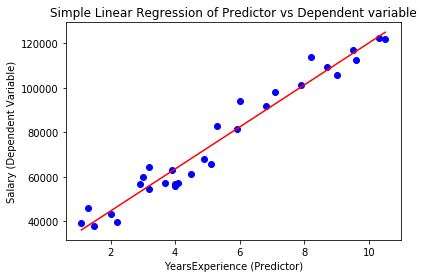

In [28]:
# Visualising the results
plt.scatter(YearsExperience, Salary, color = 'blue') #Scatter plot of the X an y dataset

plt.plot(YearsExperience, regressor.predict(YearsExperience), color = 'red')#Line plot of X against predicted Y 
#(remember that output of regressor.predict is yhat)

plt.title('Simple Linear Regression of Predictor vs Dependent variable')
plt.xlabel('YearsExperience (Predictor)')
plt.ylabel('Salary (Dependent Variable)')
plt.show()


In [29]:
#Adding the result column to the existing dataset table

data['yhat'] = y_pred

data

,YearsExperience,Salary,yhat
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


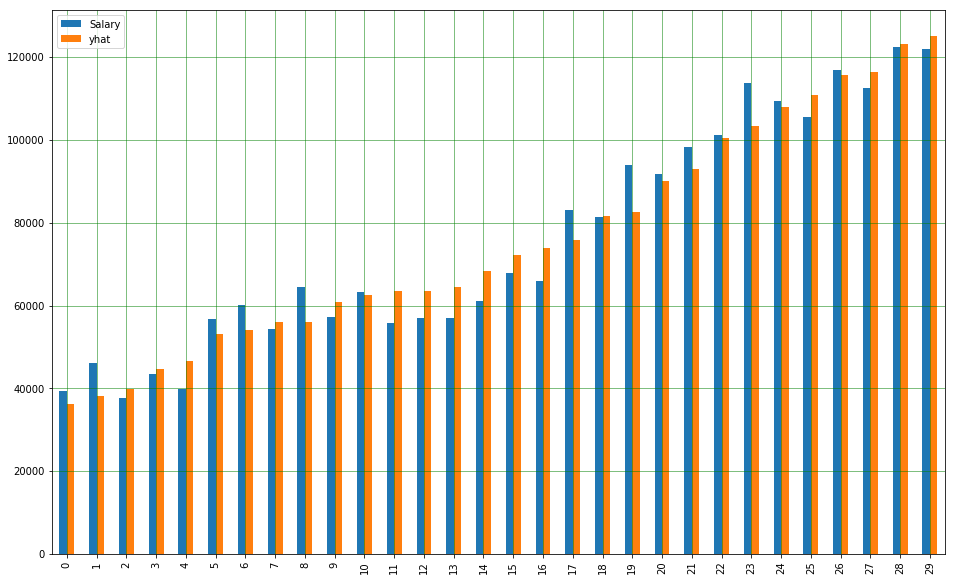

In [31]:
#A bar plot showing the diffrence between actual value (Salary) and predicted value (yhat)
data[['Salary','yhat']].plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [32]:
#. How well does the regression equation fit the data?

In [33]:
#Slicing out the Actual outout(y) and Predicted output (yhat)
result = data[['Salary', 'yhat']]

In [36]:
#creating a column in the result to store mean errors from all observations
n = len(data)

#Error from each prediction
result['error'] = data['Salary'].subtract(data['yhat'])

print(result)

#summation of all error function from all predictions
cost_function = abs(result['error']).sum()

Mean_Absolute_Error = cost_function / n




print()

print(cost_function)
print(Mean_Absolute_Error)

      Salary           yhat         error
0    39343.0   36187.158752   3155.841248
1    46205.0   38077.151217   8127.848783
2    37731.0   39967.143681  -2236.143681
3    43525.0   44692.124842  -1167.124842
4    39891.0   46582.117306  -6691.117306
5    56642.0   53197.090931   3444.909069
6    60150.0   54142.087163   6007.912837
7    54445.0   56032.079627  -1587.079627
8    64445.0   56032.079627   8412.920373
9    57189.0   60757.060788  -3568.060788
10   63218.0   62647.053252    570.946748
11   55794.0   63592.049484  -7798.049484
12   56957.0   63592.049484  -6635.049484
13   57081.0   64537.045717  -7456.045717
14   61111.0   68317.030645  -7206.030645
15   67938.0   72097.015574  -4159.015574
16   66029.0   73987.008038  -7958.008038
17   83088.0   75877.000502   7210.999498
18   81363.0   81546.977895   -183.977895
19   93940.0   82491.974127  11448.025873
20   91738.0   90051.943985   1686.056015
21   98273.0   92886.932681   5386.067319
22  101302.0  100446.902538    855

In [37]:
# Using SKLEARN regression metrics

In [38]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Salary, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Salary, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Salary, y_pred)))

Mean Absolute Error: 4644.2012894435375
Mean Squared Error: 31270951.722280957
Root Mean Squared Error: 5592.043608760661


In [ ]:
## Conclusion

The disparity between the actual y(salary) and predicted yhat  and shows that the algorithm is  very accurate.
1.high value were usee
